In [1]:
from statannotations.statannotations import Annotator
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


sns.set(style="whitegrid")

### Boxplot non-hue

#### Multiple comparisons

By default, no multiple comparisons correction is applied.

In [2]:
df = sns.load_dataset("tips")

p-value annotation legend:
****: 1.00e-03 < p <= 1.00e-04
***: 1.00e-02 < p <= 1.00e-03
**: 5.00e-02 < p <= 1.00e-02
*: 1.00e+00 < p <= 5.00e-02
ns: p <= 1.00e+00

Thur v.s. Fri: Mann-Whitney-Wilcoxon test two-sided, P_val:6.477e-01 U_stat=6.305e+02
Thur v.s. Sat: Mann-Whitney-Wilcoxon test two-sided, P_val:4.690e-02 U_stat=2.180e+03
Sun v.s. Fri: Mann-Whitney-Wilcoxon test two-sided, P_val:2.680e-02 U_stat=9.605e+02


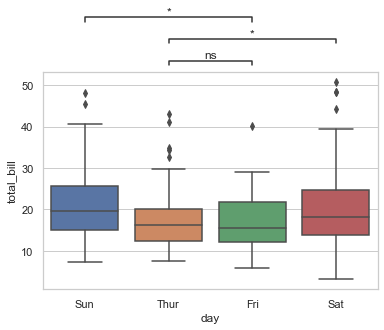

In [3]:
x = "day"
y = "total_bill"
order = ['Sun', 'Thur', 'Fri', 'Sat']
ax = sns.boxplot(data=df, x=x, y=y, order=order)
annot = Annotator(ax, [("Thur", "Fri"), ("Thur", "Sat"), ("Fri", "Sun")], data=df, x=x, y=y, order=order)
annot.configure(test='Mann-Whitney', text_format='star', loc='outside', verbose=2)
annot.apply_test()
ax, test_results = annot.add_stat_annotation()
plt.savefig('example_non-hue_outside.png', dpi=300, bbox_inches='tight')

#### Statistical test results

The `add_stat_annotation` method returns the tuple `ax, test_results`, where `test_results` is a list of `StatResult` objects, containing both the original data of the boxes and the statistical test results (p-value, etc).

In [4]:
for res in test_results:
    print(res)

print("\nStatResult attributes:", test_results[0].__dict__.keys())

Mann-Whitney-Wilcoxon test two-sided, P_val:6.477e-01 U_stat=6.305e+02
Mann-Whitney-Wilcoxon test two-sided, P_val:4.690e-02 U_stat=2.180e+03
Mann-Whitney-Wilcoxon test two-sided, P_val:2.680e-02 U_stat=9.605e+02

StatResult attributes: dict_keys(['test_description', 'test_short_name', 'stat_str', 'stat_value', 'pval', '_corrected_significance', '_correction_method', 'alpha', 'box1', 'box2'])


#### Applying a multiple comparisons correction (requires `statsmodels`)
In this example, note that previously configured parameters are remembered if not changed.
This is the case for `box_pairs`, `test`, `text_format`, and `loc`.

To avoid this, you can call `annot.reset_configuration()` to get back to all default/unset values.

p-value annotation legend:
****: 1.00e-03 < p <= 1.00e-04
***: 1.00e-02 < p <= 1.00e-03
**: 5.00e-02 < p <= 1.00e-02
*: 1.00e+00 < p <= 5.00e-02
ns: p <= 1.00e+00

Thur v.s. Fri: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val:1.000e+00 U_stat=6.305e+02
Thur v.s. Sat: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val:1.407e-01 U_stat=2.180e+03
Sun v.s. Fri: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val:8.041e-02 U_stat=9.605e+02


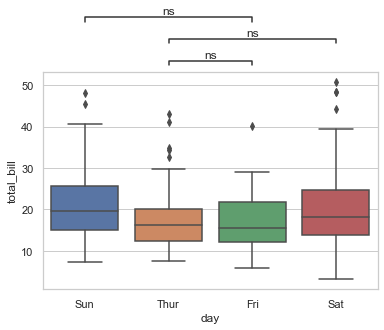

In [5]:
plotting = {
    "data": df,
    "x": x,
    "y": y,
    "order": order
}
ax = sns.boxplot(**plotting)
annot.new_plot(ax, **plotting)
annot.configure(comparisons_correction="Bonferroni", verbose=2)
annot.apply_test()
test_results = annot.add_stat_annotation()

Or another

p-value annotation legend:
****: 1.00e-03 < p <= 1.00e-04
***: 1.00e-02 < p <= 1.00e-03
**: 5.00e-02 < p <= 1.00e-02
*: 1.00e+00 < p <= 5.00e-02
ns: p <= 1.00e+00

Thur v.s. Fri: Mann-Whitney-Wilcoxon test two-sided with Benjamini-Hochberg correction, P_val:6.477e-01 U_stat=6.305e+02
Thur v.s. Sat: Mann-Whitney-Wilcoxon test two-sided with Benjamini-Hochberg correction, P_val:4.690e-02 (ns) U_stat=2.180e+03
Sun v.s. Fri: Mann-Whitney-Wilcoxon test two-sided with Benjamini-Hochberg correction, P_val:2.680e-02 (ns) U_stat=9.605e+02


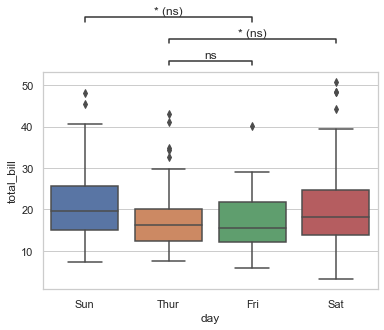

In [7]:
x = "day"
y = "total_bill"
order = ['Sun', 'Thur', 'Fri', 'Sat']
ax = sns.boxplot(data=df, x=x, y=y, order=order)
annot.new_plot(ax, data=df, x=x, y=y, order=order)
annot.configure(comparisons_correction="BH")
annot.apply_test()
test_results = annot.add_stat_annotation()

#### Location

Statistical test annotation can be either drawn inside the plot area (`loc='inside'`), or on top on it (`loc='outside'`).

p-value annotation legend:
****: 1.00e-03 < p <= 1.00e-04
***: 1.00e-02 < p <= 1.00e-03
**: 5.00e-02 < p <= 1.00e-02
*: 1.00e+00 < p <= 5.00e-02
ns: p <= 1.00e+00

Thur v.s. Fri: Custom statistical test with Benjamini-Hochberg correction, P_val:1.000e-01
Thur v.s. Sat: Custom statistical test with Benjamini-Hochberg correction, P_val:1.000e-01
Sun v.s. Fri: Custom statistical test with Benjamini-Hochberg correction, P_val:1.000e-03


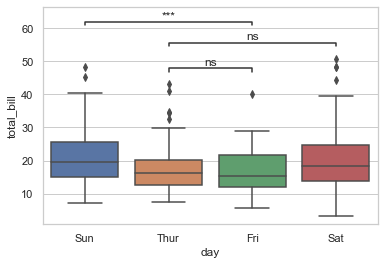

In [9]:
x = "day"
y = "total_bill"
order = ['Sun', 'Thur', 'Fri', 'Sat']
ax = sns.boxplot(data=df, x=x, y=y, order=order)
annot.new_plot(ax, data=df, x=x, y=y, order=order)
annot.configure(test=None, loc='inside')
annot.set_custom_annotation(pvalues=[0.1, 0.1, 0.001])
annot.add_stat_annotation()
plt.savefig('example_non-hue_inside.png', dpi=300, bbox_inches='tight')

### Boxplot with hue

We create boxes with unequal ymax position.

In [10]:
df = sns.load_dataset('diamonds')
df = df[df['color'].map(lambda x: x in 'EIJ')]
# Modifying data to yield unequal boxes in the hue value
df.loc[df['cut'] == 'Ideal', 'price'] = df.loc[df['cut'] == 'Ideal', 'price'].map(lambda x: min(x, 5000))
df.loc[df['cut'] == 'Premium', 'price'] = df.loc[df['cut'] == 'Premium', 'price'].map(lambda x: min(x, 7500))
df.loc[df['cut'] == 'Good', 'price'] = df.loc[df['cut'] == 'Good', 'price'].map(lambda x: min(x, 15000))
df.loc[df['cut'] == 'Very Good', 'price'] = df.loc[df['cut'] == 'Very Good', 'price'].map(lambda x: min(x, 3000))
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


p-value annotation legend:
****: 1.00e-03 < p <= 1.00e-04
***: 1.00e-02 < p <= 1.00e-03
**: 5.00e-02 < p <= 1.00e-02
*: 1.00e+00 < p <= 5.00e-02
ns: p <= 1.00e+00

E_Ideal v.s. E_Premium: Mann-Whitney-Wilcoxon test two-sided with Benjamini-Hochberg correction, P_val:1.560e-31 U_stat=3.756e+06
I_Ideal v.s. I_Premium: Mann-Whitney-Wilcoxon test two-sided with Benjamini-Hochberg correction, P_val:5.141e-61 U_stat=1.009e+06
J_Ideal v.s. J_Premium: Mann-Whitney-Wilcoxon test two-sided with Benjamini-Hochberg correction, P_val:4.018e-37 U_stat=2.337e+05
E_Ideal v.s. E_Good: Mann-Whitney-Wilcoxon test two-sided with Benjamini-Hochberg correction, P_val:5.201e-19 U_stat=1.480e+06
I_Ideal v.s. I_Good: Mann-Whitney-Wilcoxon test two-sided with Benjamini-Hochberg correction, P_val:5.008e-13 U_stat=4.359e+05
J_Ideal v.s. J_Good: Mann-Whitney-Wilcoxon test two-sided with Benjamini-Hochberg correction, P_val:1.006e-04 U_stat=1.174e+05
E_Ideal v.s. E_Very Good: Mann-Whitney-Wilcoxon test two-sided wi

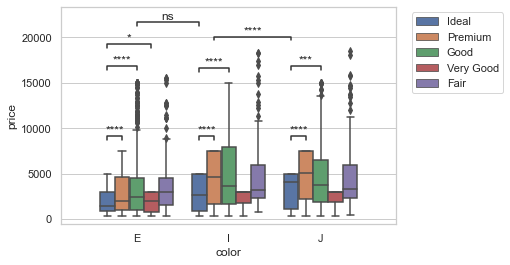

In [11]:
x = "color"
y = "price"
hue = "cut"
hue_order=['Ideal', 'Premium', 'Good', 'Very Good', 'Fair']
order = ["E", "I", "J"]
box_pairs=[
    (("E", "Ideal"), ("E", "Very Good")),
    (("E", "Ideal"), ("E", "Premium")),
    (("E", "Ideal"), ("E", "Good")),
    (("I", "Ideal"), ("I", "Premium")),
    (("I", "Ideal"), ("I", "Good")),
    (("J", "Ideal"), ("J", "Premium")),
    (("J", "Ideal"), ("J", "Good")),
    (("E", "Good"), ("I", "Ideal")),
    (("I", "Premium"), ("J", "Ideal")),
    ]
ax = sns.boxplot(data=df, x=x, y=y, order=order, hue=hue, hue_order=hue_order)
annot.new_plot(ax, box_pairs, data=df, x=x, y=y, order=order, hue=hue, hue_order=hue_order)
annot.configure(test='Mann-Whitney', verbose=2)
annot.apply_test()
annot.add_stat_annotation()
plt.legend(loc='upper left', bbox_to_anchor=(1.03, 1))
plt.savefig('example_hue_layout.png', dpi=300, bbox_inches='tight')

### Boxplot with bucketed categories

In [ ]:
df = sns.load_dataset("tips")
df['tip_bucket'] = pd.cut(df['tip'], 3)
df.head()

In [ ]:
# In this case we just have to pass the list of categories objects to the add_stat_annotation function.
tip_bucket_list = df['tip_bucket'].unique()
tip_bucket_list

In [ ]:
x = "day"
y = "total_bill"
hue = "tip_bucket"
data = df
ax = sns.boxplot(data=df, x=x, y=y, hue=hue)
add_stat_annotation(
    ax, data=df, x=x, y=y, hue=hue,
    box_pairs=[(("Sat", tip_bucket_list[2]), ("Fri", tip_bucket_list[0]))],
    test='t-test_ind', loc='inside', verbose=2)

plt.legend(loc='upper left', bbox_to_anchor=(1.03, 1))
plt.savefig('example_bucketed.png', dpi=300, bbox_inches='tight')

### Barplot with hue

Note: Support for barplot has not been fully implemented yet.

In [ ]:
df = sns.load_dataset('diamonds')
df = df[df['color'].map(lambda c: c in 'EIJ')]

x = "clarity"
y = "carat"
hue = "color"
hue_order=["E", "I", "J"]
box_pairs = [
    (("SI2", "E"), ("SI1", "E"))
    ]
box_pairs = box_pairs + [((clar, 'I'), (clar, 'J')) for clar in df['clarity'].unique()]
width = 0.4
ax = sns.barplot(data=df, x=x, y=y, hue=hue, hue_order=hue_order)
add_stat_annotation(
    ax, plot='barplot', data=df, x=x, y=y, hue=hue, hue_order=hue_order,
    box_pairs=box_pairs, test='t-test_ind', loc='inside', verbose=2)

plt.legend(loc='upper left', bbox_to_anchor=(1.03, 1), title=hue)
plt.savefig('example_barplot_hue.png', dpi=300, bbox_inches='tight')

### Tuning y offsets

![](example_tuning_y_offsets_w_arguments.png)

In [ ]:
df = sns.load_dataset("tips")
x = "day"
y = "total_bill"
hue = "smoker"
ax = sns.boxplot(data=df, x=x, y=y, hue=hue)
add_stat_annotation(
    ax, data=df, x=x, y=y, hue=hue,
    box_pairs=[(("Thur", "No"), ("Fri", "No")),
               (("Sat", "Yes"), ("Sat", "No")),
               (("Sun", "No"), ("Thur", "Yes"))],
    test='t-test_ind', text_format='full', loc='inside',
    comparisons_correction=None, line_offset_to_box=0.2, line_offset=0.1,
    line_height=0.05, text_offset=8, verbose=2)

plt.legend(loc='upper left', bbox_to_anchor=(1.03, 1))
plt.savefig('example_tuning_y_offsets.svg')
plt.savefig('example_tuning_y_offsets.png', dpi=300, bbox_inches='tight')

### Use a different test with StatTest

In [ ]:
from statannotations.stats.StatTest import StatTest

# For example bartlett's test
from scipy.stats import bartlett

df = sns.load_dataset("iris")
x = "species"
y = "sepal_length"

box_pairs = [("setosa", "versicolor"), ("setosa", "virginica"), ("versicolor", "virginica")]

# Required descriptors for add_stat_annotation
custom_long_name = 'Bartlett statistical test for equal variances'
custom_short_name = 'Bartlett'
custom_func = bartlett
custom_test = StatTest(custom_func, custom_long_name, custom_short_name)

# Then, same as usual
ax = sns.boxplot(data=df, x=x, y=y)
add_stat_annotation(ax, data=df, x=x, y=y, box_pairs=box_pairs,
                    comparisons_correction=None, test=custom_test,
                    text_format='star', verbose=2)

### Custom p-values as input

In [ ]:
from scipy.stats import bartlett

test_short_name = 'Bartlett'
pvalues = []
for pair in box_pairs:
    data1 = df.groupby(x)[y].get_group(pair[0])
    data2 = df.groupby(x)[y].get_group(pair[1])
    stat, p = bartlett(data1, data2)
    print("Performing Bartlett statistical test for equal variances on pair:",
          pair, "stat={:.2e} p-value={:.2e}".format(stat, p))
    pvalues.append(p)
print("pvalues:", pvalues)

In [ ]:
ax = sns.boxplot(data=df, x=x, y=y)
add_stat_annotation(ax, data=df, x=x, y=y, box_pairs=box_pairs,
                    perform_stat_test=False, pvalues=pvalues,
                    test_short_name=test_short_name, text_format='star',
                    verbose=2)

### Custom annotation texts

In [ ]:
df = sns.load_dataset("tips")
x = "day"
y = "total_bill"
order = ['Sun', 'Thur', 'Fri', 'Sat']
ax = sns.boxplot(data=df, x=x, y=y, order=order)
add_stat_annotation(
    ax, data=df, x=x, y=y, order=order,
    box_pairs=[("Thur", "Fri"),("Thur", "Sat"), ("Fri", "Sun")],
    text_annot_custom=["first pair", "second pair", "third pair"],
    perform_stat_test=False, pvalues=[0, 0, 0], loc='outside', verbose=0)

plt.savefig('example_custom_text_annot.png', dpi=300, bbox_inches='tight')